In [133]:
import pandas as pd
import numpy as np
import seaborn as sns
import os

os.listdir('../input/tcd-ml-comp-201920-rec-alg-click-pred-group')

['tcdml1920-rec-click-pred--submission file (example).csv',
 'tcdml1920-rec-click-pred--submission file.csv',
 'tcdml1920-rec-click-pred--test.csv',
 'tcdml1920-rec-click-pred--training.csv']

In [162]:
train = pd.read_csv('../input/tcd-ml-comp-201920-rec-alg-click-pred-group/tcdml1920-rec-click-pred--training.csv') 
test = pd.read_csv('../input/tcd-ml-comp-201920-rec-alg-click-pred-group/tcdml1920-rec-click-pred--test.csv')
test = test.dropna(subset=['recommendation_set_id'])

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (4,5,34) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [135]:
test.shape

(9145, 46)

In [106]:
print('Shape', train.shape, '\n')
print('Columns \n', train.columns, '\n')

Shape (385687, 46) 

Columns 
 Index(['recommendation_set_id', 'user_id', 'session_id', 'query_identifier',
       'query_word_count', 'query_char_count', 'query_detected_language',
       'query_document_id', 'document_language_provided', 'year_published',
       'number_of_authors', 'abstract_word_count', 'abstract_char_count',
       'abstract_detected_language', 'first_author_id',
       'num_pubs_by_first_author', 'organization_id', 'application_type',
       'item_type', 'request_received', 'hour_request_received',
       'response_delivered', 'rec_processing_time', 'app_version', 'app_lang',
       'user_os', 'user_os_version', 'user_java_version', 'user_timezone',
       'country_by_ip', 'timezone_by_ip', 'local_time_of_request',
       'local_hour_of_request', 'number_of_recs_in_set',
       'recommendation_algorithm_id_used', 'algorithm_class', 'cbf_parser',
       'search_title', 'search_keywords', 'search_abstract',
       'time_recs_recieved', 'time_recs_displayed', 'time_

In [107]:
train.loc[train['rec_processing_time'] > 60][['request_received', 'response_delivered', 'rec_processing_time']]

,request_received,response_delivered,rec_processing_time
43407,23/01/2019 14:21,23/01/2019 14:56,2042.4700
63120,14/02/2019 12:16,14/02/2019 12:20,216.3300
73384,25/02/2019 18:03,25/02/2019 18:04,66.3469
74911,27/02/2019 03:57,27/02/2019 08:39,16930.6000
94649,19/03/2019 11:56,19/03/2019 12:00,226.9120
97366,21/03/2019 20:48,21/03/2019 22:03,4478.8100
101097,26/03/2019 01:51,26/03/2019 06:35,17064.4000
112088,06/04/2019 20:24,07/04/2019 01:08,16990.9000
122277,17/04/2019 09:01,17/04/2019 09:02,102.3070
126501,23/04/2019 03:15,23/04/2019 03:16,69.2949


In [ ]:
train.loc[train['time_recs_viewed'] != "\\N"][['time_recs_recieved', 'time_recs_displayed', 'time_recs_viewed']].head()

In [ ]:
# train['time_recs_recieved'] = pd.to_datetime(train['time_recs_recieved'])
# train['time_recs_displayed'] = pd.to_datetime(train['time_recs_displayed'])
# train['time_recs_viewed'] = pd.to_datetime(train['time_recs_viewed'])

In [164]:
test.head()

,recommendation_set_id,user_id,session_id,query_identifier,query_word_count,query_char_count,query_detected_language,query_document_id,document_language_provided,year_published,...,cbf_parser,search_title,search_keywords,search_abstract,time_recs_recieved,time_recs_displayed,time_recs_viewed,clicks,ctr,set_clicked
0,46914.0,\N,\N,Withheld for privacy,18,126,en,\N,\N,\N,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
1,46961.0,\N,\N,Withheld for privacy,5,60,en,\N,\N,\N,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
2,47012.0,\N,\N,Withheld for privacy,8,54,en,\N,\N,\N,...,edismax_QP,yes,yes,no,nA,nA,nA,nA,nA,NaN
3,47181.0,\N,\N,Withheld for privacy,9,59,en,11559885,\N,2017,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN
4,47240.0,\N,\N,Withheld for privacy,10,81,en,\N,\N,\N,...,standard_QP,yes,no,no,nA,nA,nA,nA,nA,NaN


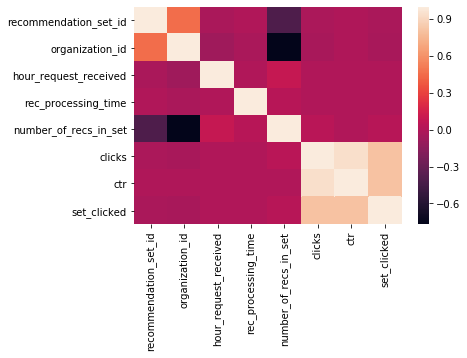

In [163]:
corrmat = train.corr()
sns.heatmap(corrmat)

In [ ]:
corrmat.sort_values(['set_clicked'], ascending = False, inplace = True)
print(corrmat['set_clicked'])

In [24]:
#This function takes a DataFrame(df) as input and returns two columns, total missing values and total missing values percentage
def missing_percentage(df):
    total = df.isnull().sum().sort_values(ascending = False)[df.isnull().sum().sort_values(ascending = False) != 0]
    percent = round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2)[round(df.isnull().sum().sort_values(ascending = False) / len(df) * 100, 2) != 0]
    return pd.concat([total, percent], axis = 1, keys=['Total', 'Percent'])

In [27]:
missing_percentage(train)

,Total,Percent


In [ ]:
train['query_identifier'].describe()

In [ ]:
train['query_detected_language'].unique()

In [ ]:
train['user_timezone'].describe()

In [ ]:
train['user_java_version'].describe()

In [ ]:
train['country_by_ip'].describe()

In [ ]:
train['country_by_ip'].value_counts()

In [ ]:
train['cbf_parser'].value_counts()

In [ ]:
train['num_pubs_by_first_author'].describe()

In [ ]:
train['local_time_of_request'].describe()

In [ ]:
train['recommendation_algorithm_id_used'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="Recommendation algorithms count")

In [ ]:
train['query_detected_language'].unique()

In [ ]:
train['query_detected_language'].value_counts().plot(kind='bar',
                                    figsize=(14,8),
                                    title="query_detected_language count")

In [ ]:
train['organization_id'].value_counts().plot(kind='bar',
                                            title="organization_id count")

In [ ]:
train.search_title.value_counts()

In [ ]:
train['hour_request_received'].value_counts().plot(kind='bar',
                                            title="hour_request_received count")

In [ ]:
train['search_keywords'].value_counts()

In [ ]:
train['local_time_of_request'].describe()

In [ ]:
train['clicks'].value_counts()

In [33]:
train['ctr'].value_counts()

0.0000    378924
0.1429      3858
0.3333       977
0.2857       944
0.4286       328
0.2000       144
0.5714       132
1.0000        77
0.6667        70
0.7143        48
0.4000        37
0.8571        33
0.1667        30
0.5000        28
0.2500        12
0.6000         8
1.2000         6
1.2857         5
1.1429         4
1.4286         3
0.7500         3
1.3333         3
1.5714         3
2.0000         3
0.8000         2
2.7143         1
2.5000         1
2.5714         1
1.6667         1
1.6000         1
Name: ctr, dtype: int64

## Transformations

In [136]:
# Filtering out data where processing time is more than 60 secs
train = train.loc[train['rec_processing_time'] < 60]

# Click through rate should only be between 0 and 1
train = train.loc[train['ctr'] <= 1]

In [137]:
nan_fields = ['query_detected_language', 'country_by_ip', 'cbf_parser', 'query_word_count', 
              'query_char_count', 'recommendation_algorithm_id_used', 'app_version', 
              'local_hour_of_request', 'item_type', 'app_lang']
for col in nan_fields:   
    train[col].replace({
        '\\N': np.nan
    }, inplace = True)
    
    test[col].replace({
        '\\N': np.nan
    }, inplace = True)

# train['local_time_of_request'].replace({
#     '\\N': np.nan
# }, inplace = True)

In [138]:
train = train.drop(columns = [
    'user_id',
    'session_id',
    
    # Following are only to be used for filtering    
    'request_received',
    'response_delivered',
    'rec_processing_time',
    'time_recs_recieved',
    'time_recs_displayed',
    'time_recs_viewed',
    
    'query_identifier', # 70% are witheld for privacy
    'query_document_id', # 70% are \N
    'document_language_provided', # 99% are \N
    'year_published', # 80 % are \N
    'abstract_word_count', # 60 % are \N
    'first_author_id',
    'num_pubs_by_first_author',
    'number_of_authors',
    
    'abstract_word_count',
    'abstract_char_count',
    'abstract_detected_language',
    
    'user_os', # Mostly empty
    'user_os_version',
    'user_timezone',
    'user_java_version',
    
    # Only nan in test data
    'number_of_recs_in_set',
    'number_of_recs_in_set', 
    'ctr',
    'clicks',
    
    # All of the following columns may be useful but are not easy to process    
    'local_time_of_request', # Might be useful but ignoring for now
    'timezone_by_ip' # Not comprehensible
])

test = test.drop(columns = [
    'user_id',
    'session_id',
    
    'request_received',
    'response_delivered',
    'rec_processing_time',
    'time_recs_recieved',
    'time_recs_displayed',
    'time_recs_viewed',
    
    'query_identifier',
    'query_document_id',
    'document_language_provided',
    'year_published',
    'first_author_id',
    'num_pubs_by_first_author',
    'number_of_authors',
    'abstract_word_count',
    'abstract_char_count',
    'abstract_detected_language',
    
    'user_os',
    'user_os_version', 
    'user_timezone',
    'user_java_version',
    
    'number_of_recs_in_set', 
    'ctr',
    'clicks',
    
    'local_time_of_request',
    'timezone_by_ip',
    'set_clicked' # Not needed in test
])

In [139]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : ")
print(numerical_features)
print("Categorical features : ")
print(categorical_features)

Numerical features : 
Index(['recommendation_set_id', 'organization_id', 'hour_request_received',
       'set_clicked'],
      dtype='object')
Categorical features : 
Index(['query_word_count', 'query_char_count', 'query_detected_language',
       'application_type', 'item_type', 'app_version', 'app_lang',
       'country_by_ip', 'local_hour_of_request',
       'recommendation_algorithm_id_used', 'algorithm_class', 'cbf_parser',
       'search_title', 'search_keywords', 'search_abstract'],
      dtype='object')


In [140]:
for cat in categorical_features:
    train[cat] = train[cat].fillna(train[cat].value_counts().index[0])
    test[cat] = test[cat].fillna(test[cat].value_counts().index[0])

In [141]:
# Convert all objects that should actually be ints
for col in ['query_word_count', 'query_char_count', 'local_hour_of_request', 'recommendation_algorithm_id_used']:
    train[col] = train[col].astype(str).astype(int)
    test[col] = test[col].astype(str).astype(int)

In [142]:
categorical_features = train.select_dtypes(include = ["object"]).columns
numerical_features = train.select_dtypes(exclude = ["object"]).columns
print("Numerical features : ")
print(numerical_features)
print("Categorical features : ")
print(categorical_features)

Numerical features : 
Index(['recommendation_set_id', 'query_word_count', 'query_char_count',
       'organization_id', 'hour_request_received', 'local_hour_of_request',
       'recommendation_algorithm_id_used', 'set_clicked'],
      dtype='object')
Categorical features : 
Index(['query_detected_language', 'application_type', 'item_type',
       'app_version', 'app_lang', 'country_by_ip', 'algorithm_class',
       'cbf_parser', 'search_title', 'search_keywords', 'search_abstract'],
      dtype='object')


In [143]:
# Converting to boolean
bool_cols = ['search_title', 'search_keywords', 'search_abstract']

for col in bool_cols:
    train[col] = train[col].eq('yes').mul(1)
    train[col] = train[col].astype(bool)
    
    test[col] = test[col].eq('yes').mul(1)
    test[col] = test[col].astype(bool)

In [144]:
train = train.fillna(train.median())
test = test.fillna(test.median())

In [146]:
from sklearn.preprocessing import LabelEncoder

all_data = pd.concat((train.loc[:, 'query_word_count': 'search_abstract'],
                      test.loc[:, 'query_word_count': 'search_abstract']))

le = LabelEncoder()

cols_to_label_encode = ['query_detected_language', 'application_type', 'item_type', 'app_version', 'app_lang', 'country_by_ip']
for col in cols_to_label_encode:
    all_data[col] = le.fit_transform(all_data[col])

all_data = pd.get_dummies(all_data)

In [147]:
from sklearn.model_selection import train_test_split

final_test = all_data[train.shape[0]:]

X = all_data[:train.shape[0]]
y = train['set_clicked'].astype(bool)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [148]:
X_train.head()

,query_word_count,query_char_count,query_detected_language,organization_id,application_type,item_type,hour_request_received,app_version,app_lang,country_by_ip,...,search_abstract,algorithm_class_content_based_filtering,algorithm_class_random,algorithm_class_same_author,algorithm_class_sentence_embeddings,algorithm_class_stereotype,algorithm_class_unknown,cbf_parser_edismax_QP,cbf_parser_mlt_QP,cbf_parser_standard_QP
301643,8,57,8,4.0,3,6,4.0,50,3,175,...,False,0,0,0,1,0,0,1,0,0
247923,3,31,6,1.0,2,10,17.0,50,3,8,...,False,0,0,0,1,0,0,1,0,0
384552,12,83,8,4.0,3,6,21.0,50,3,175,...,True,1,0,0,0,0,0,1,0,0
47278,4,25,6,1.0,2,10,11.0,50,1,42,...,True,1,0,0,0,0,0,1,0,0
194944,12,68,8,4.0,3,10,6.0,50,3,42,...,False,1,0,0,0,0,0,1,0,0


## Making a simple RandomForest Classifier

In [149]:
import sklearn as sk
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(X_train, y_train)
round(RF.score(X_train, y_train), 4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9936

In [150]:
RF.feature_importances_

array([1.48563801e-01, 3.30484623e-01, 4.03508286e-02, 1.42558276e-03,
       2.00721717e-03, 1.40236247e-02, 1.52676830e-01, 1.05002422e-02,
       1.50389748e-02, 1.17761410e-01, 1.18028993e-01, 2.27642091e-02,
       1.20970101e-03, 7.26403460e-03, 5.92451802e-03, 1.14929221e-03,
       7.40360424e-05, 2.42152738e-04, 1.42885483e-03, 5.65354310e-04,
       9.20436323e-04, 2.44792236e-03, 1.89766625e-03, 3.24969453e-03])

In [151]:
from sklearn.metrics import accuracy_score

predicted_labels = RF.predict(X_test)
accuracy_score(y_test, predicted_labels)

0.9805385921920987

In [156]:
prediction = RF.predict(final_test)
submission = pd.read_csv('../input/tcd-ml-comp-201920-rec-alg-click-pred-group/tcdml1920-rec-click-pred--submission file.csv')
submission['set_clicked'] = prediction.astype(int)

In [158]:
submission['set_clicked'].value_counts()

0    9105
1      40
Name: set_clicked, dtype: int64

In [160]:
submission.to_csv('rfc_sol.csv', index = False)